In [2]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import datetime

%matplotlib inline

# Create an EDEX data request
edexServer = "edex-cloud.unidata.ucar.edu"
datatype = "binlightning"
DataAccessLayer.changeEDEXHost(edexServer)
request = DataAccessLayer.newDataRequest(datatype)

# Show available sources
sources = DataAccessLayer.getIdentifierValues(request, "source")
print("available sources:")
print(list(sources))
print("")
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
print("available parameters:")
print(list(availableParms))

available sources:
['GLMfl', 'GLMgr', 'GLMev']

available parameters:
['height', 'intensity', 'msgType', 'pulseCount', 'pulseIndex', 'sensorCount', 'strikeType']


In [4]:
request.addIdentifier("source", "GLMgr")
request.setParameters("intensity")
times = DataAccessLayer.getAvailableTimes(request)
response = DataAccessLayer.getGeometryData(request, [times[-1]])
glm_points = []
for data in response:
       glm_points.append(data.getGeometry())
ob = response[0]

In [34]:
glm_points[1].

False

In [21]:
# Contrust a full satellite product tree
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest("satellite")
creatingEntities = DataAccessLayer.getIdentifierValues(request, "creatingEntity")
for entity in creatingEntities:
    print(entity)
    request = DataAccessLayer.newDataRequest("satellite")
    request.addIdentifier("creatingEntity", entity)
    availableSectors = DataAccessLayer.getAvailableLocationNames(request)
    availableSectors.sort()
    for sector in availableSectors:
        print(" - " + sector)
        request.setLocationNames(sector)
        availableProducts = DataAccessLayer.getAvailableParameters(request)
        availableProducts.sort()
        for product in availableProducts:
            print("    - " + product)

GOES-17
 - AKREGI
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
 - HIREGI
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
 - WCONUS
    - CH-01-0.47um
    - CH-02-0.64um
    - CH-03-0.87um
    - CH-04-1.38um
    - CH-05-1.61um
    - CH-06-2.25um
    - CH-07-3.90um
    - CH-08-6.19um
    - CH-09-6.95um
    - CH-10-7.34um
    - CH-11-8.50um
    - CH-12-9.61um
    - CH-13-10.35um
    - CH-14-11.20um
    - CH-15-12.30um
    - CH-16-13.30um
 - WFD
    - CH-01-0.47um
    - CH-02-

Text(0.5, 1.0, 'Jun 22 21 21:07:10 GMT | GLMgr | edex-cloud.unidata.ucar.edu')

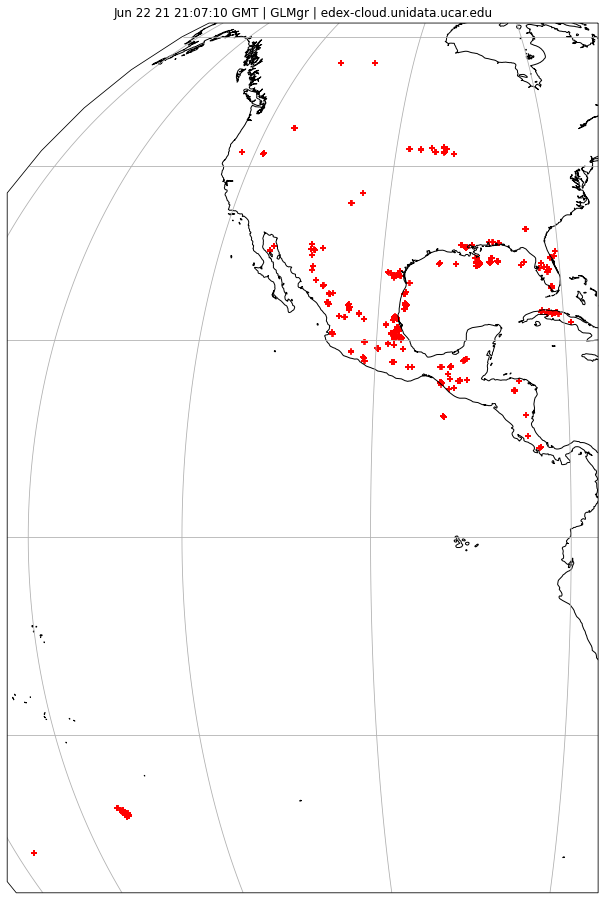

In [9]:
# Plot markers
fig, ax = plt.subplots(figsize=(16,16),subplot_kw=dict(projection=ccrs.Orthographic(central_longitude=-90.0)))
ax.coastlines(resolution='50m')
ax.gridlines()
ax.scatter([point.x for point in glm_points],
       [point.y for point in glm_points],
       transform=ccrs.PlateCarree(),marker="+",facecolor='red')
ax.set_title(str(response[-1].getDataTime().getRefTime()) + " | " + ob.getAttribute('source') + " | " + edexServer)